In [70]:
import pandas as pd
import numpy as np

In [71]:
df = pd.read_csv(r"C:\Users\ARYAN SHARMA\Desktop\titanic\train.csv",usecols=['Survived','Pclass','Embarked','Age','Fare'])

In [72]:
df

,Survived,Pclass,Age,Fare,Embarked
0,0,3,22.0,7.2500,S
1,1,1,38.0,71.2833,C
2,1,3,26.0,7.9250,S
3,1,1,35.0,53.1000,S
4,0,3,35.0,8.0500,S
...,...,...,...,...,...
886,0,2,27.0,13.0000,S
887,1,1,19.0,30.0000,S
888,0,3,NaN,23.4500,S
889,1,1,26.0,30.0000,C


In [73]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
Embarked      2
dtype: int64

In [74]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\ARYAN SHARMA\AppData\Local\Temp\ipykernel_28556\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [75]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
Embarked    2
dtype: int64

In [76]:
X = df.iloc[:,1:4]
y = df.iloc[:,0]

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


C:\Users\ARYAN SHARMA\AppData\Local\Temp\ipykernel_28556\3408025006.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


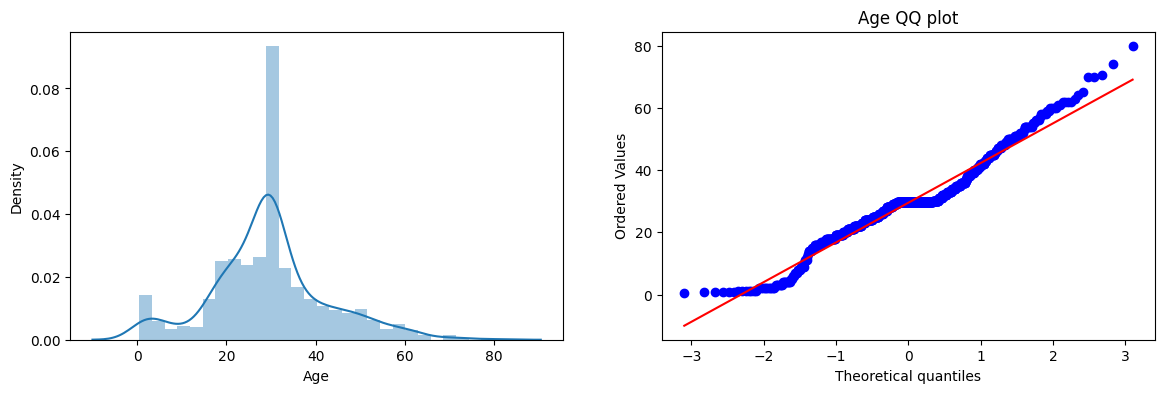

In [80]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ plot')
plt.show()


C:\Users\ARYAN SHARMA\AppData\Local\Temp\ipykernel_28556\429331135.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


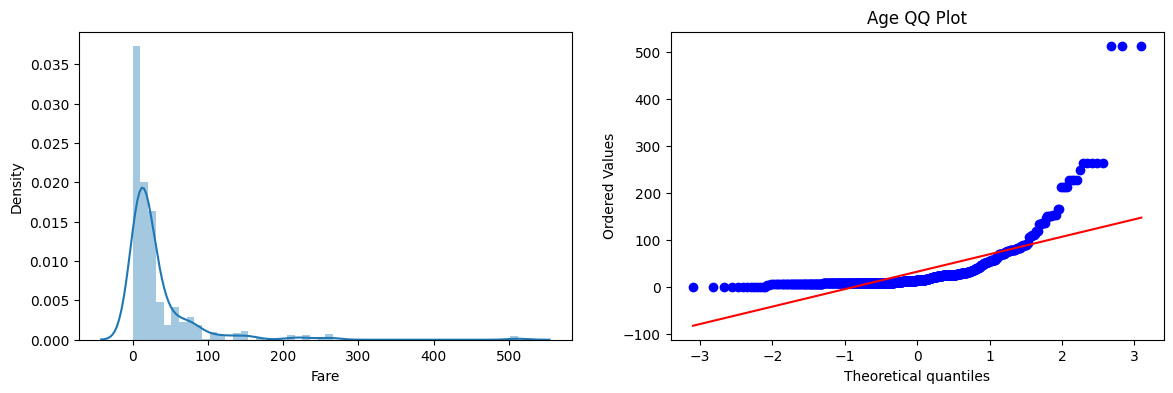

In [81]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])

plt.subplot(122)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title('Age QQ Plot')
plt.show()

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score


In [97]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [98]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))


Accuracy LR 0.7374301675977654
Accuracy DT 0.6815642458100558


In [99]:
trf = FunctionTransformer(func=np.log1p)


In [100]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [101]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.7206703910614525
Accuracy DT 0.7374301675977654


In [102]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.7049812734082398
DT 0.6543196004993758


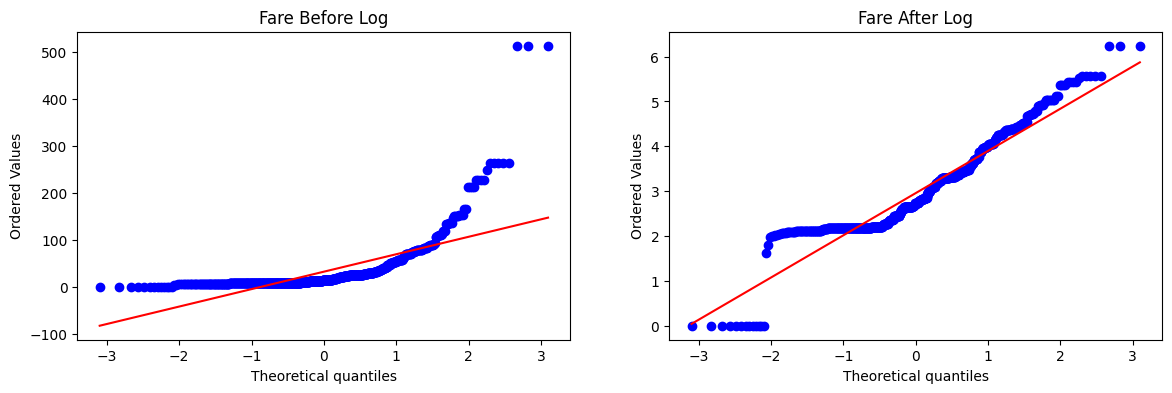

In [103]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

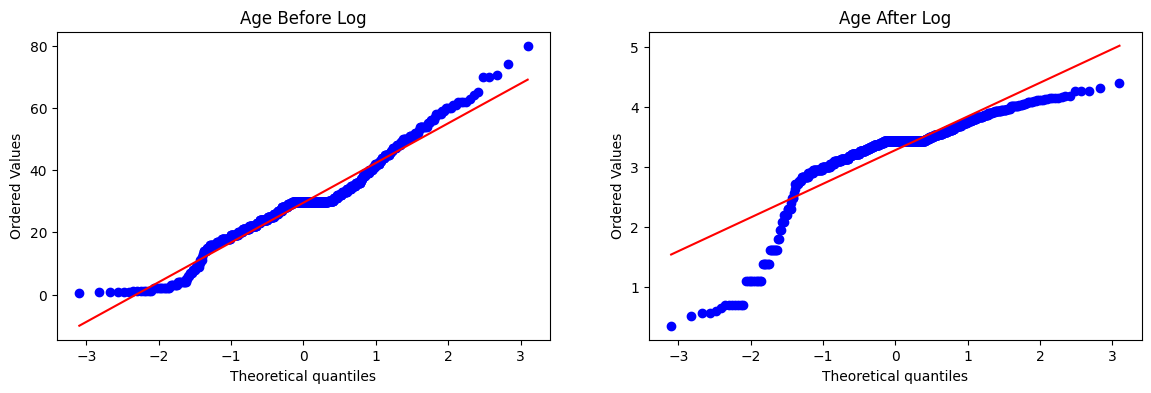

In [104]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()